# Gradient Descent from Scratch in Python

<img src="images/11/gdsc.png" />

## Importing the necessary packages

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

## Linear Equation as Matrix Multiplication

We can calculate the predictions of a linear equation $\vec{y_{pred}}$ as the matrix multiplication between a vector $\vec{x_{}}$ and a matrix $A$ as shown in the equation: 
### $$\vec{y_{pred}}=\vec{x_{}}A$$

<img src="images/11/matmul.png" />

In [2]:
# Matrix multiplication
x1 = 2
x0 = 1
a1 = 3
a0 = 4

x = [x1, x0]
A = [[a1], [a0]]

y_pred = np.matmul(x, A)
print(y_pred)

[10]


## Mean Squared Error Loss

We can calculate the MSE Loss as the average squared error between two vectors $\vec{y_{true}}$ and $\vec{y_{pred}}$. $n$ is the number of items in either $\vec{y_{true}}$ or $\vec{y_{pred}}$

### $$MSE=\frac{\sum{(\vec{y_{true}}-\vec{y_{pred}})^{2}}}{n}$$

In [3]:
# Mean Squared Error
y_true = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y_pred = np.array([5, 25, 25, 45, 45, 65, 65, 85, 85, 105])

mse = np.mean((y_true - y_pred)**2)
print(mse)

25.0


## Gradient: Partial Derivative of MSE

The Partial Derivatives of MSE with respect to each of the two parameters in the parameter matrix $A$ is defined as

#### $$\frac{\partial MSE}{\partial a_{1}}=\frac{\sum{-2\vec{x_{1}}(\vec{y_{true}}-\vec{y_{pred}})}}{n}$$
#### $$\frac{\partial MSE}{\partial a_{0}}=\frac{\sum{-2\vec{x_{0}}(\vec{y_{true}}-\vec{y_{pred}})}}{n}$$

Where, $\vec{y_{pred}}=\vec{x_{}}A=\vec{x_{1}}a_{1}+\vec{x_{0}}a_{0}$

In [4]:
# MSE Partial Derivatives
x1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
x0 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

y_true = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y_pred = np.array([5, 25, 25, 45, 45, 65, 65, 85, 85, 105])

pd_a1 = np.mean(-2*x1*(y_true - y_pred))
pd_a0 = np.mean(-2*x0*(y_true - y_pred))

print(pd_a1, pd_a0)

5.0 0.0


## Descent: Updating the parameters in the direction of lowering the Loss

We find the new values of the parameters by subtracting the product of the learning rate $\eta$ and the Partial Derivatives of MSE from the previous values of the parameters.

#### $$a_1=a_1-\eta\frac{\partial MSE}{\partial a_{1}}$$
#### $$a_0=a_0-\eta\frac{\partial MSE}{\partial a_{0}}$$

In [5]:
lr = 0.01

a1 = a1 - lr*pd_a1
a0 = a0 - lr*pd_a0

print(a1, a0)

2.95 4.0


# Putting everything together

## Optional: Create some data for x and y

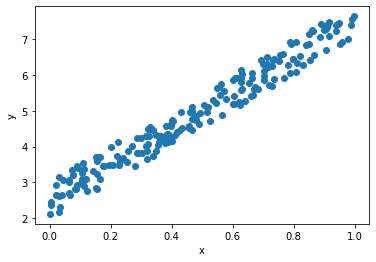

In [6]:
# Prepare a dummy linear correlation of 200 data points. In reality you will already have data for both x and y
num_data = 200

# Inputs
x = np.ones((num_data, 2)) # x0
x[:,1] = random.random(num_data) # x1

# Actual value of the Parameters
a = [2, 5] # [a0, a1]

# Outputs
y_true = np.matmul(x, a) + random.random(num_data)

# Plot
plt.scatter(x[:,1], y_true)
plt.xlabel('x')
plt.ylabel('y');

## Wrap everything into a function

In [7]:
def linear_eqn_gradient_descent(x, y_true, lr=0.1, num_epochs=500):
    # Plot the ground truth
    plt.scatter(x[:,1], y_true, label='y_true')
    
    # Step0: Randomly assign starting parameters
    a = random.random(2)

    for epoch in range(num_epochs+1):
        # Step1: Matrix Multiplication to calculate y_pred
        y_pred = np.matmul(x, a)

        # Step2: Loss Calculation
        mse = np.mean((y_true - y_pred)**2)

        # Step3: Gradient: Calculate Partial Derivatives
        pd_a1 = np.mean(-2*x[:,1]*(y_true - y_pred))
        pd_a0 = np.mean(-2*x[:,0]*(y_true - y_pred))

        # Step4: Descent: Updating the parameters in the direction of lowering the Loss
        a[1] = a[1] - lr*pd_a1
        a[0] = a[0] - lr*pd_a0

        if epoch%100 == 0:
            # Plot the line on every 100th trial
            plt.scatter(x[:,1], y_pred, label=epoch)

        # Step5: Repeat from Step1
    plt.legend()
    print('Final MSE = ', mse)

Final MSE =  0.07709234830381542


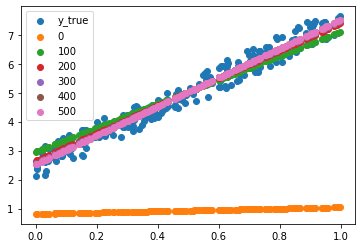

In [8]:
linear_eqn_gradient_descent(x, y_true)

Final MSE =  0.239419080671245


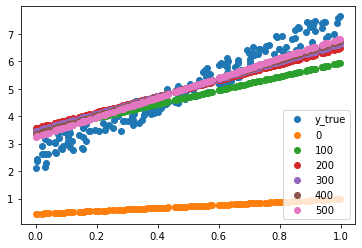

In [9]:
linear_eqn_gradient_descent(x, y_true, lr=0.01)

Final MSE =  0.07985255073429842


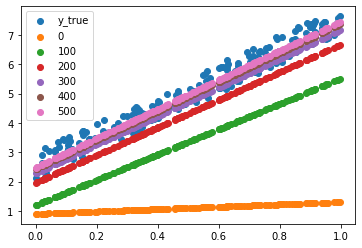

In [10]:
linear_eqn_gradient_descent(x, y_true, lr=0.8)

## Non-Linearities

In [11]:
# ReLU in numpy
x = [30, -32]
relu = np.maximum(0, x)
print(relu)

[30  0]


In [12]:
# Softmax in numpy
x = [30, 32]
softmax = np.exp(x) / np.sum(np.exp(x))
print(softmax)

[0.11920292 0.88079708]


## Categorical Cross Entropy Loss

In [13]:
# Categorical Crossentropy Loss in numpy
y_true = [0, 1]
y_pred = softmax
cce_loss = -np.sum(y_true * np.log10(y_pred))
print(cce_loss)

0.05512413479491803
